# Ayiti Analytics Probability and Statistics Project

Use all the files to have a final datasets to have the following columns
   <ul>
    <li>questid</li>
    <li>gender</li>
    <li>age (age of applicant)</li>
    <li>communeName (use data prep in commune file)</li>
    <li>application_date (created at in quest file)</li>
    <li>enroll_date (created_at in enroll file)</li>
    <li>is_enroll (Yes/No) (use data prep in enroll file)</li>
    <li>Education Level</li>
   <li>Communication channels(hear_AA1)</li>
    <li>Bootcamp Insterest (after_AA)</li>
    <li>Payement Date (use ord and transaction files)</li>
    <li>Payed (Yes/No)</li>
    <li>list Technologies as columns based (use get_dummies)</li>
    <li>list  Study domains (use get_dummies)</li>
    <li>Job is formal</li>
    <li>Have computer at home</li>
    <li>Have internet at home</li>
    
   </ul>
   

## Import of libraries

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from scipy.stats import shapiro
from scipy.stats import wilcoxon
from scipy.stats import ttest_1samp
from scipy.stats import chi2_contingency

## Retrieving Data File

In [35]:
commune_data       = pd.read_excel('commune.xlsx', index_col=0)
enroll_data        = pd.read_csv('enroll.csv', index_col=0)
industry_data      = pd.read_csv('industry.csv', index_col=0)
ord_data           = pd.read_csv('ord.csv', index_col=0)
quest_data         = pd.read_csv('quest.csv', index_col=0)
study_domain_data  = pd.read_csv('study_domain.csv', index_col=0)
technology_data    = pd.read_csv('technology.csv', index_col=0)
transaction_data   = pd.read_csv('transaction.csv', index_col=0)

### Clean Commune Data File

In [36]:
commune_data.head(2)

,Commune_FR,Commune_Id,Departement,ADM1_PCODE
Commune_en,,,,
Abricots,Abricots,HT0812,Grande'Anse,HT08
Acul du Nord,Acul du Nord,HT0321,North,HT03


In [37]:
#Select necessary columns
commune_data = commune_data.loc[:,['Commune_FR', 'Commune_Id']]

#Rename selected columns for a better use
commune_data.columns = ['commune_name','commune_id']

#set the index
commune_data = commune_data.set_index('commune_id')

In [38]:
commune_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, HT0812 to HT0532
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   commune_name  140 non-null    object
dtypes: object(1)
memory usage: 2.2+ KB


In [39]:
commune_data.head(2)

,commune_name
commune_id,
HT0812,Abricots
HT0321,Acul du Nord


### Clean Quest Data File

In [40]:
quest_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   gender              250 non-null    object
 1   dob                 244 non-null    object
 2   commune             250 non-null    object
 3   created_at          250 non-null    object
 4   modified_at         250 non-null    object
 5   department          249 non-null    object
 6   education_level     250 non-null    object
 7   university          250 non-null    object
 8   study_domain        250 non-null    object
 9   current_employed    250 non-null    object
 10  formal_sector_job   250 non-null    object
 11  have_computer_home  250 non-null    object
 12  internet_at_home    250 non-null    object
 13  hear_AA_1           250 non-null    object
 14  after_AA            250 non-null    object
 15  quest_id            250 non-null    object
dtypes: object(16)
memory usage

In [41]:
###Drop unwanted column
quest_data.drop(columns=['modified_at','department','university','study_domain','current_employed'], inplace=True)

###Rename columns for better use
quest_data.columns = ['gender','dob','commune_id','application_date','education_level',
                      'formal_sector_job','have_computer_home','internet_at_home',
                      'communication_channels','bootcamp_insterest','quest_id']
###Replace wrong dob format
quest_data['dob'] = quest_data['dob'].replace(['3 aout 1977'],'03/08/1977')
###Convert column dob to datetime 
quest_data['dob'] = pd.to_datetime(quest_data['dob'])
quest_data['application_date'] = pd.to_datetime(quest_data['application_date'])
###Fill Null Values with the average value
quest_data.dob = quest_data['dob'].fillna(value=quest_data.dob.mean())
#set the data in quest.commune_id to upper
quest_data['commune_id'] = quest_data['commune_id'].str.upper()

quest_data = quest_data.set_index('commune_id')

In [42]:
quest_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, HT0111 to HT1012
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   gender                  250 non-null    object             
 1   dob                     250 non-null    datetime64[ns]     
 2   application_date        250 non-null    datetime64[ns, UTC]
 3   education_level         250 non-null    object             
 4   formal_sector_job       250 non-null    object             
 5   have_computer_home      250 non-null    object             
 6   internet_at_home        250 non-null    object             
 7   communication_channels  250 non-null    object             
 8   bootcamp_insterest      250 non-null    object             
 9   quest_id                250 non-null    object             
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), object(8)
memory usage: 21.5+ KB


In [43]:
f_merge = pd.merge(left =commune_data,right=quest_data,how="inner",on="commune_id")
f_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, HT0731 to HT0532
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   commune_name            250 non-null    object             
 1   gender                  250 non-null    object             
 2   dob                     250 non-null    datetime64[ns]     
 3   application_date        250 non-null    datetime64[ns, UTC]
 4   education_level         250 non-null    object             
 5   formal_sector_job       250 non-null    object             
 6   have_computer_home      250 non-null    object             
 7   internet_at_home        250 non-null    object             
 8   communication_channels  250 non-null    object             
 9   bootcamp_insterest      250 non-null    object             
 10  quest_id                250 non-null    object             
dtypes: datetime64[ns, UTC](1), datetime64[ns](

### Clean Ord Data File

In [44]:
# Creating the payment column 
ord_data['paid']= 'yes'
ord_data=ord_data.loc[:,['created_at','user_id','paid']]
ord_data.head(2)

,created_at,user_id,paid
0,2021-03-14T15:34:35.014Z,41587952,yes
1,2021-03-14T04:20:23.483Z,41564742,yes


### Setting up Transanctio Data File

In [45]:
transaction_data['paid'] = 'yes'
transaction_data = transaction_data.loc[:,['created_at','user_id','paid']]
transaction_data.head(2)

,created_at,user_id,paid
0,2021-03-08T05:08:50.832Z,40976440,yes
1,2021-03-08T17:26:35.841Z,41179271,yes


In [46]:
#Concat Transaction and Ord Data File
trans_ord=pd.concat([transaction_data,ord_data], axis=0)
trans_ord=trans_ord.rename(columns={'created_at':'payment_date'})
trans_ord

,payment_date,user_id,paid
0,2021-03-08T05:08:50.832Z,40976440,yes
1,2021-03-08T17:26:35.841Z,41179271,yes
2,2021-03-08T18:52:09.147Z,40973512,yes
3,2021-03-08T19:06:32.837Z,41177453,yes
4,2021-03-08T22:10:00.796Z,40797121,yes
...,...,...,...
13,2021-02-18T14:45:02.292Z,39908510,yes
14,2021-02-17T13:48:38.371Z,39903501,yes
15,2021-02-17T11:08:54.385Z,39896120,yes
16,2021-02-16T20:09:31.627Z,39856539,yes


In [47]:
##Setting up enroll file
enroll_data = enroll_data.rename(columns={'created_at':'enroll_date'})
enroll_data = enroll_data.loc[:,['enroll_date','user_id','quest_id']]
enroll_data['is_enroll']='yes'
enroll_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 147
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   enroll_date  148 non-null    object
 1   user_id      148 non-null    int64 
 2   quest_id     102 non-null    object
 3   is_enroll    148 non-null    object
dtypes: int64(1), object(3)
memory usage: 5.8+ KB


In [48]:
#Second merge between the concatenation result of Transaction and Ord Data File and Enroll Data File
S_merge = pd.merge(left =trans_ord,right=enroll_data,how="right",on="user_id")
S_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   payment_date  77 non-null     object
 1   user_id       148 non-null    int64 
 2   paid          77 non-null     object
 3   enroll_date   148 non-null    object
 4   quest_id      102 non-null    object
 5   is_enroll     148 non-null    object
dtypes: int64(1), object(5)
memory usage: 8.1+ KB


In [49]:
#Merge the Fisrt dataset and the second one
dataset = pd.merge(left =f_merge,right=S_merge,how="left",on="quest_id")
dataset=dataset.drop(columns='user_id')
dataset['is_enroll']= dataset['is_enroll'].fillna('no')
dataset['paid']= dataset['paid'].fillna('no')

In [50]:
#Function that calculate age from Date of birth 
from datetime import datetime, date
def age(dob):
    today = date.today()
    return today.year - dob.year - ((today.month,today.day)< (dob.month,dob.day))

In [51]:
dataset['age'] = dataset['dob'].apply(age)
dataset.loc[:,['dob','age']]

,dob,age
0,1995-12-05,25
1,1995-09-16,25
2,1987-04-19,34
3,1991-09-08,29
4,1987-02-22,34
...,...,...
245,1988-09-17,32
246,1997-11-23,23
247,1980-12-04,40
248,1984-01-22,37


In [52]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   commune_name            250 non-null    object             
 1   gender                  250 non-null    object             
 2   dob                     250 non-null    datetime64[ns]     
 3   application_date        250 non-null    datetime64[ns, UTC]
 4   education_level         250 non-null    object             
 5   formal_sector_job       250 non-null    object             
 6   have_computer_home      250 non-null    object             
 7   internet_at_home        250 non-null    object             
 8   communication_channels  250 non-null    object             
 9   bootcamp_insterest      250 non-null    object             
 10  quest_id                250 non-null    object             
 11  payment_date            65 non-null     objec

In [53]:
#List of study domain using get_dummies methode to trnasforme row to column 
study_domain = pd.get_dummies(data=study_domain_data[["quest_id", "values"]], columns=['values'],prefix ="",prefix_sep="",dtype=int)
study_domain =study_domain.groupby("quest_id").sum()
study_domain.head(2)

,Accounting,Computer Science,Economics,Electrical Engineering,Law,Management,Medicine,Statistics,other
quest_id,,,,,,,,,
905ddcf2-ce95-11eb-9a92-7c67a234f601,0,0,0,0,0,0,0,0,1
905e4cf5-ce95-11eb-96a9-7c67a234f601,0,1,0,0,0,1,0,0,0


In [54]:
study_domain.columns

Index(['Accounting', 'Computer Science', 'Economics', 'Electrical Engineering',
       'Law', 'Management', 'Medicine', 'Statistics', 'other'],
      dtype='object')

In [55]:
#List of technologies using get_dummies methode to trnasforme row to column
technology = pd.get_dummies(data=technology_data[["quest_id", "values"]], columns=['values'],prefix ="",prefix_sep="",dtype=int)
technology = technology.groupby("quest_id").sum()
technology.head(2)

,Bash,Excel,Git,Java,JavaScript,PHP,PowerBI or Tableau,Python,R,SQL,VBA,other
quest_id,,,,,,,,,,,,
905ddcf2-ce95-11eb-9a92-7c67a234f601,0,1,0,0,0,0,0,0,1,0,0,0
905e2608-ce95-11eb-809f-7c67a234f601,1,1,1,1,1,0,0,1,0,1,0,0


In [56]:
technology.columns

Index(['Bash', 'Excel', 'Git', 'Java', 'JavaScript', 'PHP',
       'PowerBI or Tableau', 'Python', 'R', 'SQL', 'VBA', 'other'],
      dtype='object')

In [57]:
dataset_tt = pd.merge(left =dataset,right=technology,how="outer",on="quest_id")
dataset_tt = pd.merge(left =dataset_tt,right=study_domain,how="outer",on="quest_id")

In [58]:
dataset_tt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   commune_name            250 non-null    object             
 1   gender                  250 non-null    object             
 2   dob                     250 non-null    datetime64[ns]     
 3   application_date        250 non-null    datetime64[ns, UTC]
 4   education_level         250 non-null    object             
 5   formal_sector_job       250 non-null    object             
 6   have_computer_home      250 non-null    object             
 7   internet_at_home        250 non-null    object             
 8   communication_channels  250 non-null    object             
 9   bootcamp_insterest      250 non-null    object             
 10  quest_id                250 non-null    object             
 11  payment_date            65 non-null     objec

In [59]:
dataset_tt = dataset_tt.drop(columns=['other_y','other_x'])

In [60]:
dataset_tt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   commune_name            250 non-null    object             
 1   gender                  250 non-null    object             
 2   dob                     250 non-null    datetime64[ns]     
 3   application_date        250 non-null    datetime64[ns, UTC]
 4   education_level         250 non-null    object             
 5   formal_sector_job       250 non-null    object             
 6   have_computer_home      250 non-null    object             
 7   internet_at_home        250 non-null    object             
 8   communication_channels  250 non-null    object             
 9   bootcamp_insterest      250 non-null    object             
 10  quest_id                250 non-null    object             
 11  payment_date            65 non-null     objec

In [61]:
cols=dataset_tt.iloc[:,16:].columns
for i in cols:
    dataset_tt[i]= dataset_tt[i].fillna(0.0)
dataset_tt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   commune_name            250 non-null    object             
 1   gender                  250 non-null    object             
 2   dob                     250 non-null    datetime64[ns]     
 3   application_date        250 non-null    datetime64[ns, UTC]
 4   education_level         250 non-null    object             
 5   formal_sector_job       250 non-null    object             
 6   have_computer_home      250 non-null    object             
 7   internet_at_home        250 non-null    object             
 8   communication_channels  250 non-null    object             
 9   bootcamp_insterest      250 non-null    object             
 10  quest_id                250 non-null    object             
 11  payment_date            65 non-null     objec

In [62]:
dataset_tt.shape

(250, 35)

###  1. How many observations and variables are there in the dataset
 

In [63]:
# here your codes
print('1.1-. The number of observations found in the dataset are',dataset_tt.shape[0])
print('1.2-. The number of variables found in the dataset are',dataset_tt.shape[1])

1.1-. The number of observations found in the dataset are 250
1.2-. The number of variables found in the dataset are 35


### 2.A Calculate the average age of the observations
   * On the whole dataset
   * On the whole male dataset
   * On all the female dataset
### 2.B Calculate 
   * variance of the whole datatset,male and female
   * kurtosis of the whole datatset,male and female
   * skewness of the whole datatset,male and female
### 2.C Does the age distribution follow a normal distribution 
   

In [64]:
# here your codes
print('---------------2.A-. Average---------------')
average_age = dataset_tt['age'].mean()
print('2.1-. The average age of the whole dataset is ',int(average_age))

average_male_age = dataset_tt[dataset_tt['gender']=='male']['age'].mean()
print('2.2-. The average age of male gender is ',int(average_male_age))

average_female_age = dataset_tt[dataset_tt['gender']=='female']['age'].mean()
print('2.3-. The average age of female is ',int(average_female_age))

print('---------------2.B-. Variance---------------')
age_var = dataset_tt['age'].var()
print('2.1-. The variance age of the whole dataset is ',age_var)

var_male_age = dataset_tt[dataset_tt['gender']=='male']['age'].var()
print('2.2-. The variance age of male gender is ',var_male_age)

var_female_age = dataset_tt[dataset_tt['gender']=='female']['age'].var()
print('2.3-. The variance age of female is ',var_female_age)

print('---------------2.B.a-. Kurtosis---------------')
age_kurtosis = dataset_tt['age'].kurtosis()
print('2.1-. The kurtosis of age of the whole dataset is ',age_kurtosis)

kurt_male_age = dataset_tt[dataset_tt['gender']=='male']['age'].kurtosis()
print('2.2-. The kurtosis of age of male gender is ',kurt_male_age)

kurt_female_age = dataset_tt[dataset_tt['gender']=='female']['age'].kurtosis()
print('2.3-. The kurtosis of age of female is ',kurt_female_age)

print('---------------2.B.b-. Skewness---------------')
age_skew = dataset_tt['age'].skew()
print('2.1-. The Skewness of age of the whole dataset is ',age_skew)

skew_male_age = dataset_tt[dataset_tt['gender']=='male']['age'].skew()
print('2.2-. The Skewness of age of male gender is ',skew_male_age)

skew_female_age = dataset_tt[dataset_tt['gender']=='female']['age'].skew()
print('2.3-. The Skewness of age of female is ',skew_female_age)

print('---------------2.C-. Check Normal Distribution---------------')
'''To check if the distribution is normal, applying a statistics test is one of the to prove it's normality or not
Shapiro-Wilk test: This test is used to assess the normality of data'''

print("2.1-. Shapiro-Wilk Test for The whole dataset: ",shapiro(dataset_tt['age']))
print("2.2-. Shapiro-Wilk Test for Female Sample: ",shapiro(dataset_tt[dataset_tt['gender']=='female']['age']))
print("2.3-. Shapiro-Wilk Test for Male Sample: ",shapiro(dataset_tt[dataset_tt['gender']=='male']['age']))



---------------2.A-. Average---------------
2.1-. The average age of the whole dataset is  26
2.2-. The average age of male gender is  27
2.3-. The average age of female is  25
---------------2.B-. Variance---------------
2.1-. The variance age of the whole dataset is  50.62690763052209
2.2-. The variance age of male gender is  49.0309710774033
2.3-. The variance age of female is  56.297872340425535
---------------2.B.a-. Kurtosis---------------
2.1-. The kurtosis of age of the whole dataset is  5.170329025014944
2.2-. The kurtosis of age of male gender is  5.388166319105386
2.3-. The kurtosis of age of female is  5.20223437203292
---------------2.B.b-. Skewness---------------
2.1-. The Skewness of age of the whole dataset is  -0.6663859196316283
2.2-. The Skewness of age of male gender is  -0.631700122273029
2.3-. The Skewness of age of female is  -0.7824814474104648
---------------2.C-. Check Normal Distribution---------------
2.1-. Shapiro-Wilk Test for The whole dataset:  ShapiroRe

### 3.Display the age frequency disbrution
   * On the whole dataset
   * On the whole male dataset
   * On all the female dataset

In [109]:
#here your codes
bins = 50
sns.displot(final_tab['Age'],bins = bins,kde = True)

NameError: name 'final_tab' is not defined

### 4. Can we say that the average age (24 years old) of the observations can be considered as the average age of the population likely to participate in this bootcamp. Justify your answer

In [81]:
#here your codes
print('H0 : Average_Age  = 24') 
print('H1 : Average_Age != 24')

stat, p_value = wilcoxon(dataset_tt.age - 24)
print('Statistics = ',stat, '\np_value = ',p_value)
# interpretation
alpha = 0.05
if alpha > alpha:
	print('Ho: mu=24 (fail to reject H0)')
else:
	print('H1: mu!= 24 (reject H0)')

H0 : Average_Age  = 24
H1 : Average_Age != 24
Statistics =  4907.0 
p_value =  4.3619791623106024e-16
H1: mu!= 24 (reject H0)


### 5. Calculate the average age of participants for each communication channel

In [67]:
#here your codes
display( dataset_tt['age'].groupby(by= dataset_tt['communication_channels']).mean().to_frame())

,age
communication_channels,
Ayiti Analytics Website,27.266667
Bootcamp Alumni,26.714286
ESIH,23.888889
Facebook,26.450000
Friend,26.970149
Instagram,25.400000
LinkedIn,30.333333
WhatsApp,26.878788
other,28.777778


### 6. Display an age boxplot for each communication channel

Text(0.5, 1.0, 'Boxplot of Ages by Communication Channels')

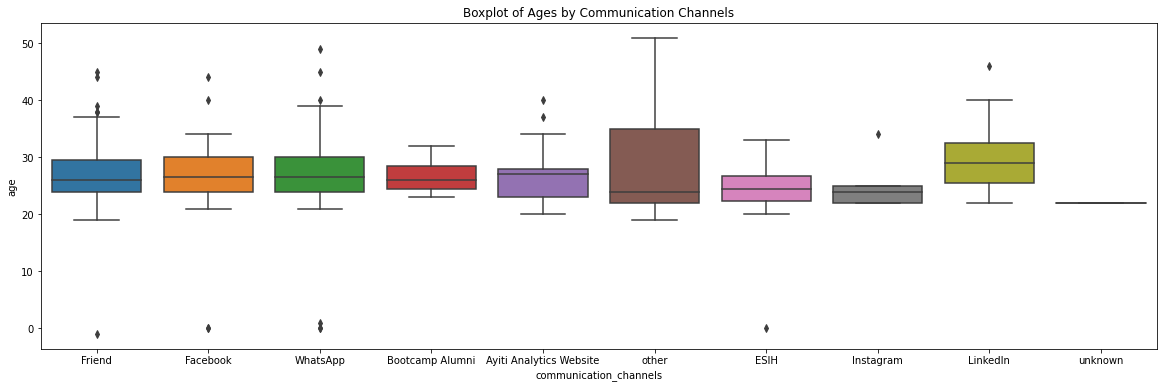

In [68]:
#here your codes
plt.figure(figsize=(20,6))
sns.boxplot(data=dataset_tt,x="communication_channels",y="age")
plt.title('Boxplot of Ages by Communication Channels')

### 7 .Is there a significant age difference between these groups

In [69]:
#here your codes
'''List of groups's Ages'''
Btcamp_Alumni_age = dataset_tt[dataset_tt['communication_channels'] == 'Bootcamp Alumni']['age'].values
LinkedIn_age      = dataset_tt[dataset_tt['communication_channels'] == 'LinkedIn']['age'].values
AA_Website_age    = dataset_tt[dataset_tt['communication_channels'] == 'Ayiti Analytics Website']['age'].values
other_age         = dataset_tt[dataset_tt['communication_channels'] == 'other']['age'].values
Instagram_age     = dataset_tt[dataset_tt['communication_channels'] == 'Instagram']['age'].values
Facebook_age      = dataset_tt[dataset_tt['communication_channels'] == 'Facebook']['age'].values
Unknown_age       = dataset_tt[dataset_tt['communication_channels'] == 'unknown']['age'].values
Friend_age        = dataset_tt[dataset_tt['communication_channels'] == 'Friend']['age'].values
ESIH_age          = dataset_tt[dataset_tt['communication_channels'] == 'ESIH']['age'].values
WhatsApp_age      = dataset_tt[dataset_tt['communication_channels'] == 'WhatsApp']['age'].values

'''ANOVA Test Hypotesis'''
print('H0 : There\'s no difference between the mean of these groups\'s ages\n',
      'H1 : There\'s a difference between the mean of these groups\'s ages')
   
stat, p_value = f_oneway(Btcamp_Alumni_age,LinkedIn_age,AA_Website_age,other_age,Instagram_age,Facebook_age,Unknown_age,Friend_age,ESIH_age,WhatsApp_age)
print("P Value: ",p_value)
if p_value < 0.05:
 print("Hypothesis:0 Rejected")
else:
 print("Hypothesis:0 Accepted")


H0 : There's no difference between the mean of these groups's ages
 H1 : There's a difference between the mean of these groups's ages
P Value:  0.5139561934701287
Hypothesis:0 Accepted


### 8.Plan a BA strategy for each communication channel regarding the age group

In [70]:
#here your codes

### 9.According to the observations what is the probability of being in each channel of communication knowing your are a woman

In [71]:
#here your codes
channels_prob_female = pd.pivot_table(dataset_tt[dataset_tt['gender']=='female'],values='quest_id',index='gender',columns='communication_channels',aggfunc = 'count',fill_value=0,margins=True)
channels_prob_female = channels_prob_female/dataset_tt.shape[0]
channels_prob_female

communication_channels,Ayiti Analytics Website,Bootcamp Alumni,ESIH,Facebook,Friend,Instagram,LinkedIn,WhatsApp,other,All
gender,,,,,,,,,,
female,0.016,0.032,0.02,0.024,0.044,0.004,0.004,0.036,0.008,0.188
All,0.016,0.032,0.02,0.024,0.044,0.004,0.004,0.036,0.008,0.188


### 10.According to the observations what is the probability of being in each channel of communication knowing your are a man

In [72]:
#here your codes
channels_prob_male = pd.pivot_table(dataset_tt[dataset_tt['gender']=='male'],values='quest_id',index='gender',columns='communication_channels',aggfunc = 'count',fill_value=0,margins=True)
channels_prob_male = channels_prob_male/dataset_tt.shape[0]
channels_prob_male

communication_channels,Ayiti Analytics Website,Bootcamp Alumni,ESIH,Facebook,Friend,Instagram,LinkedIn,WhatsApp,other,unknown,All
gender,,,,,,,,,,,
male,0.044,0.024,0.052,0.136,0.224,0.016,0.056,0.228,0.028,0.004,0.812
All,0.044,0.024,0.052,0.136,0.224,0.016,0.056,0.228,0.028,0.004,0.812


### 11. Deduce the probability of being a woman knowing each communication channel

In [73]:
#here your codes

### 12. Deduce the probability of being a man knowing each communication channel

In [74]:

#here your codes

### 13 Display a plot to see Gender vs Communication Channels .Is there any dependency between communication channels and gender?

gender,female,male
communication_channels,,
Ayiti Analytics Website,4,11
Bootcamp Alumni,8,6
ESIH,5,13
Facebook,6,34
Friend,11,56
Instagram,1,4
LinkedIn,1,14
WhatsApp,9,57
other,2,7


p-values: 0.029074844147736527
Hypothesis Rejected


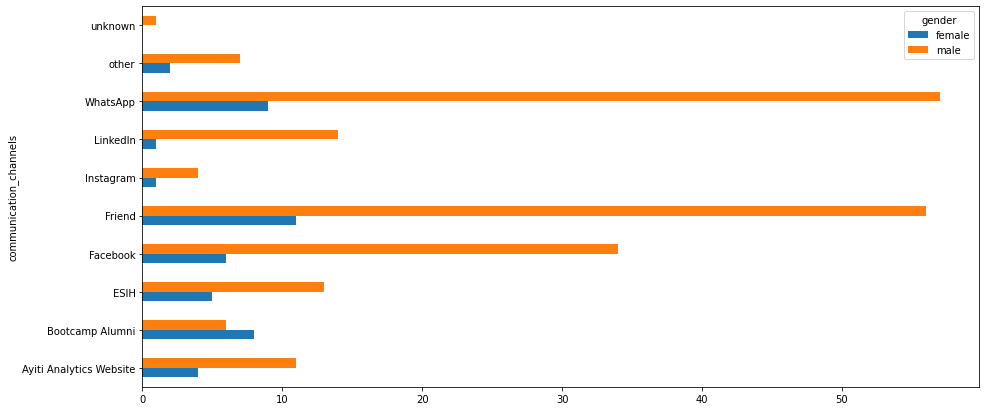

In [82]:
#here 
channels_prob = pd.pivot_table(dataset_tt,values='quest_id',index='communication_channels',columns='gender',aggfunc = 'count',fill_value=0)
#channels_prob_male = channels_prob/dataset_tt.shape[0]
display(channels_prob)

stat, p, dof, expected = chi2_contingency(channels_prob)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
    print("Hypothesis Accepted")
    
    
ax=channels_prob.plot(kind='barh')
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(15, 7)

     

### 16 Use the same method to display plot and know if is there any dependency between communication channels and Bootcamp Insterest?

communication_channels,Ayiti Analytics Website,Bootcamp Alumni,ESIH,Facebook,Friend,Instagram,LinkedIn,WhatsApp,other,unknown
bootcamp_insterest,,,,,,,,,,
Finding a job/internship,1,3,2,10,10,2,2,11,2,0
Improving my data analysis skills,9,8,12,20,38,0,10,29,4,0
Mentorship,1,0,1,3,1,0,0,6,1,0
Switching careers,2,1,0,3,4,1,1,8,0,0
Training to start my own company,2,1,2,4,14,2,2,11,1,0
other,0,0,1,0,0,0,0,1,1,0
unknown,0,1,0,0,0,0,0,0,0,1


p-values: 2.7040922010696464e-14
Hypothesis Rejected


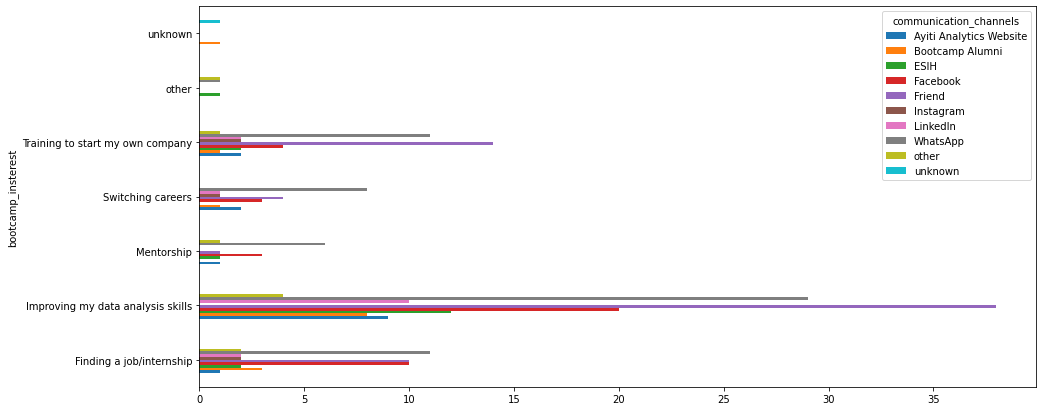

In [84]:
# here your codes
channels_btcmp_interest = pd.pivot_table(dataset_tt,values='quest_id',index='bootcamp_insterest',columns='communication_channels',aggfunc = 'count',fill_value=0)
display(channels_btcmp_interest)


stat, p, dof, expected = chi2_contingency(channels_btcmp_interest)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
    print("Hypothesis Accepted")
    
ax=channels_btcmp_interest.plot(kind='barh')
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(15, 7)    


### 17.Plan a BA  strategy for each communication channel, Bootcamp Insterest regarding the gender 

In [77]:
#here your codes

### 18.Plan a BA  strategy for each communication channel, Bootcamp Insterest regarding the gender

In [78]:
# here your codes

### 19. Calculate 
    * P(Bootcamp Insterest,Communication channels,Gender/Payed=yes)
    * P(Bootcamp Insterest,Communication channels,Gender/Payed=no)

### 20 reduce 
* P(Payed="yes"/Bootcamp Insterest="Increase Skill",Communication channels="Friend",Gender="male")
* P(Payed="no"/Bootcamp Insterest="Increase Skill",Communication channels="Friend",Gender="male")

In [79]:
# here your codes

### Based on these findings, propose strategies to increase our sales?

In [80]:
#here your codes